# Лабораторная работа 4

In [3]:
import pandas as pd

data = pd.read_csv('web_traffic.tsv',delimiter='\t', names=['hour','n_requests'])
print(type(data))

input_var = 'hour'
target_var = 'n_requests'

hours_data = data[input_var]
requests_data = data[target_var]


filtered_data = data.dropna()
filtered_data.info()

<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.frame.DataFrame'>
Index: 735 entries, 0 to 742
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   hour        735 non-null    int64  
 1   n_requests  735 non-null    float64
dtypes: float64(1), int64(1)
memory usage: 17.2 KB


In [4]:
req_data = pd.notna(requests_data)

# print(req_data)

print(hours_data[req_data])

0        1
2        3
3        4
4        5
5        6
      ... 
738    739
739    740
740    741
741    742
742    743
Name: hour, Length: 735, dtype: int64


In [5]:
import numpy as np

# TODO: Использовать функцию notna()
hours_data = hours_data[pd.notna(requests_data)]
requests_data = requests_data[pd.notna(requests_data)]

print(hours_data[:25], requests_data[:25])

0      1
2      3
3      4
4      5
5      6
6      7
7      8
8      9
9     10
10    11
11    12
12    13
13    14
14    15
15    16
16    17
17    18
18    19
19    20
20    21
21    22
23    24
24    25
25    26
26    27
Name: hour, dtype: int64 0     2272.0
2     1386.0
3     1365.0
4     1488.0
5     1337.0
6     1883.0
7     2283.0
8     1335.0
9     1025.0
10    1139.0
11    1477.0
12    1203.0
13    1311.0
14    1299.0
15    1494.0
16    1159.0
17    1365.0
18    1272.0
19    1246.0
20    1071.0
21    1876.0
23    1410.0
24     925.0
25    1533.0
26    2104.0
Name: n_requests, dtype: float64


In [ ]:
# %matplotlib inline

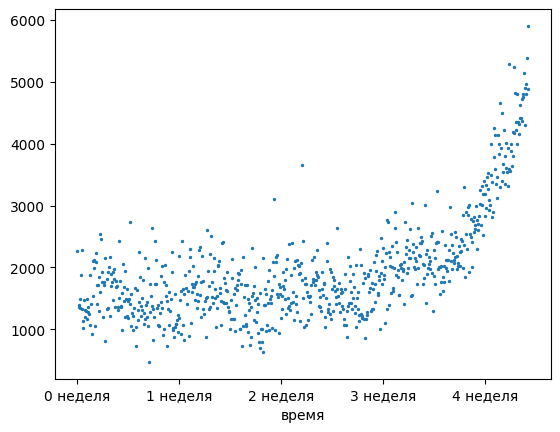

In [6]:
# Визуализация

import matplotlib.pyplot as plt

plt.scatter(hours_data, requests_data, s=2)
plt.xlabel('время')

plt.xticks([w*7*24 for w in range(6)],["%i неделя" %w for w in range(6)])

plt.autoscale(tight=False)

plt.show()

In [12]:
f2p1, residuals, rank, sv, rcond = np.polyfit(hours_data, requests_data, 1, full=True)
print("Параметры модели (1-степень) {}".format(f2p1))

f2p2, residuals, rank, sv, rcond = np.polyfit(hours_data, requests_data, 2, full=True)
print("Параметры модели (2-степень) {}".format(f2p2))

f2p3, residuals, rank, sv, rcond = np.polyfit(hours_data, requests_data, 3, full=True)
print("Параметры модели (3-степень) {}".format(f2p3))

f2p5, residuals, rank, sv, rcond = np.polyfit(hours_data, requests_data, 5, full=True)
print("Параметры модели (5-степень) {}".format(f2p5))

f2p10, residuals, rank, sv, rcond = np.polyfit(hours_data, requests_data, 10, full=True)
print("Параметры модели (10-степень) {}".format(f2p10))

f2p20, residuals, rank, sv, rcond = np.polyfit(hours_data, requests_data, 20, full=True)
print("Параметры модели (20-степень) {}".format(f2p20))

Параметры модели (1-степень) [  2.59619213 989.02487106]
Параметры модели (2-степень) [ 1.05322215e-02 -5.26545650e+00  1.97476082e+03]
Параметры модели (3-степень) [ 3.04960132e-05 -2.35893797e-02  4.94226019e+00  1.33328797e+03]
Параметры модели (5-степень) [ 2.16470951e-10 -3.13405153e-07  1.63844797e-04 -3.41497485e-02
  2.24785575e+00  1.53616050e+03]
Параметры модели (10-степень) [-3.73981968e-22  1.36473756e-18 -2.14294406e-15  1.89884971e-12
 -1.04570108e-09  3.70867731e-07 -8.45604588e-05  1.19167041e-02
 -9.41618606e-01  3.33703840e+01  1.26421204e+03]
Параметры модели (20-степень) [ 4.83083052e-47 -3.18250090e-43  8.87206977e-40 -1.31483435e-36
  9.87786034e-34 -8.55507407e-32 -5.09641038e-28  3.80310883e-25
  4.98714778e-23 -2.74828672e-19  2.35472030e-16 -1.17297667e-13
  3.93130463e-11 -9.23449401e-09  1.52941753e-06 -1.76097684e-04
  1.36396359e-02 -6.69559855e-01  1.86541218e+01 -2.35173676e+02
  2.33819938e+03]


Таким образом, наша модель будет выглядеть следующим образом:
```
f(x) = 2.59619213 * x + 989.02487106
```

Посчитаем ошибку нашей модели:

In [13]:
import warnings
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

warnings.filterwarnings("ignore", message="'squared' is deprecated")

# 1 polinomial degree
fx1 = np.poly1d(f2p1)
r2Array1 = []
r2Array1.append(r2_score(requests_data,  fx1(hours_data)))
rmse1 = mean_squared_error(requests_data, fx1(hours_data), squared=False)
mse1 = mean_squared_error(requests_data,  fx1(hours_data), squared=True)
mae1 = mean_absolute_error(requests_data,  fx1(hours_data))
print(f'Степень полинома 1: r2Array = {r2Array1}, mse = {mse1}, rmse = {rmse1}, mae = {mae1}')

# 2 polinomial degree
fx2 = np.poly1d(f2p2)
r2Array2 = []
r2Array2.append(r2_score(requests_data,  fx2(hours_data)))
rmse2 = mean_squared_error(requests_data, fx2(hours_data), squared=False)
mse2 = mean_squared_error(requests_data,  fx2(hours_data), squared=True)
mae2 = mean_absolute_error(requests_data,  fx2(hours_data))
print(f'Степень полинома 2: r2Array = {r2Array2}, mse = {mse2}, rmse = {rmse2}, mae = {mae2}')

# 3 polinomial degree
fx3 = np.poly1d(f2p3)
r2Array3 = []
r2Array3.append(r2_score(requests_data,  fx3(hours_data)))
rmse3 = mean_squared_error(requests_data, fx3(hours_data), squared=False)
mse3 = mean_squared_error(requests_data,  fx3(hours_data), squared=True)
mae3 = mean_absolute_error(requests_data,  fx3(hours_data))
print(f'Степень полинома 3: r2array = {r2Array3}, mse = {mse3}, rmse = {rmse3}, mae = {mae3}')

# 5 polinomial degree
fx5 = np.poly1d(f2p5)
r2Array5 = []
r2Array5.append(r2_score(requests_data,  fx5(hours_data)))
rmse5 = mean_squared_error(requests_data, fx5(hours_data), squared=False)
mse5 = mean_squared_error(requests_data,  fx5(hours_data), squared=True)
mae5 = mean_absolute_error(requests_data,  fx5(hours_data))
print(f'Степень полинома 5: r2array = {r2Array5}, mse = {mse5}, rmse = {rmse5}, mae = {mae5}')

# 10 polinomial degree
fx10 = np.poly1d(f2p10)
r2Array10 = []
r2Array10.append(r2_score(requests_data,  fx10(hours_data)))
rmse10 = mean_squared_error(requests_data, fx10(hours_data), squared=False)
mse10 = mean_squared_error(requests_data,  fx10(hours_data), squared=True)
mae10 = mean_absolute_error(requests_data,  fx10(hours_data))
print(f'Степень полинома 10: r2array = {r2Array10}, mse = {mse10}, rmse = {rmse10}, mae = {mae10}')

# 20 polinomial degree
fx20 = np.poly1d(f2p20)
r2Array20 = []
r2Array20.append(r2_score(requests_data,  fx20(hours_data)))
rmse20 = mean_squared_error(requests_data, fx20(hours_data), squared=False)
mse20 = mean_squared_error(requests_data,  fx20(hours_data), squared=True)
mae20 = mean_absolute_error(requests_data,  fx20(hours_data))
print(f'Степень полинома 20: r2array = {r2Array20}, mse = {mse20}, rmse = {rmse20}, mae = {mae20}')

Степень полинома 1: r2Array = [0.41632369094258914], mse = 431822.81270718103, rmse = 657.1322642415156, mae = 504.88101037565264
Степень полинома 2: r2Array = [0.6690122985058977], mse = 244875.52092269278, rmse = 494.84898799804853, mae = 389.26631899805625
Степень полинома 3: r2array = [0.7437366099834488], mse = 189592.0326962248, rmse = 435.4216722858714, mae = 344.1036970490545
Степень полинома 5: r2array = [0.7711107518847922], mse = 169339.74770906617, rmse = 411.50911011673384, mae = 325.1390989686416
Степень полинома 10: r2array = [0.7757493961877407], mse = 165907.92702530022, rmse = 407.31796796274557, mae = 319.04082734267826
Степень полинома 20: r2array = [0.7967407157687268], mse = 150377.86263304277, rmse = 387.78584635471515, mae = 300.7347745484516


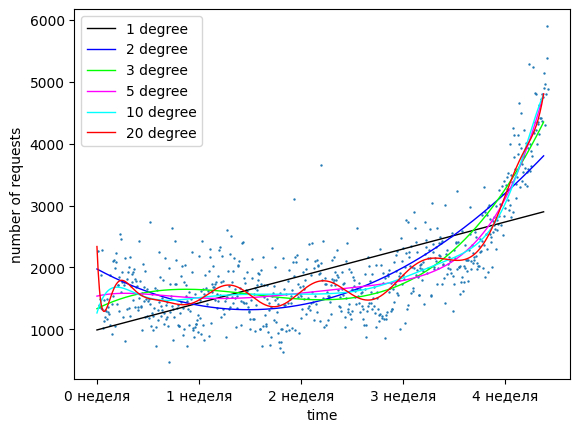

In [14]:
# Визуализация

import matplotlib.pyplot as plt

plt.scatter(hours_data, requests_data, s=0.5)
plt.xlabel('time')
plt.ylabel('number of requests')
plt.xticks([w*7*24 for w in range(6)],["%i неделя" %w for w in range(6)])

f2x = np.linspace(0, hours_data[len(hours_data)], len(hours_data))

# viz. polynomial degree 1
f2y1 = fx1(f2x)
plt.plot(f2x, f2y1, linewidth=1.0, color='black', label = '1 degree')

# viz. polynomial degree 2
f2y2 = fx2(f2x)
plt.plot(f2x, f2y2, linewidth=1.0, color='blue', label = '2 degree')

# viz. polynomial degree 3
f2y3 = fx3(f2x)
plt.plot(f2x, f2y3, linewidth=1.0, color='lime', label = '3 degree')

# viz. polynomial degree 5
f2y5 = fx5(f2x)
plt.plot(f2x, f2y5, linewidth=1.0, color='magenta', label = '5 degree')

# viz. polynomial degree 10
f2y10 = fx10(f2x)
plt.plot(f2x, f2y10, linewidth=1.0, color='cyan', label = '10 degree')

# viz. polynomial degree 20
f2y20 = fx20(f2x)
plt.plot(f2x, f2y20, linewidth=1.0, color='red', label = '20 degree')


plt.autoscale(tight=False)
plt.legend()
plt.show()

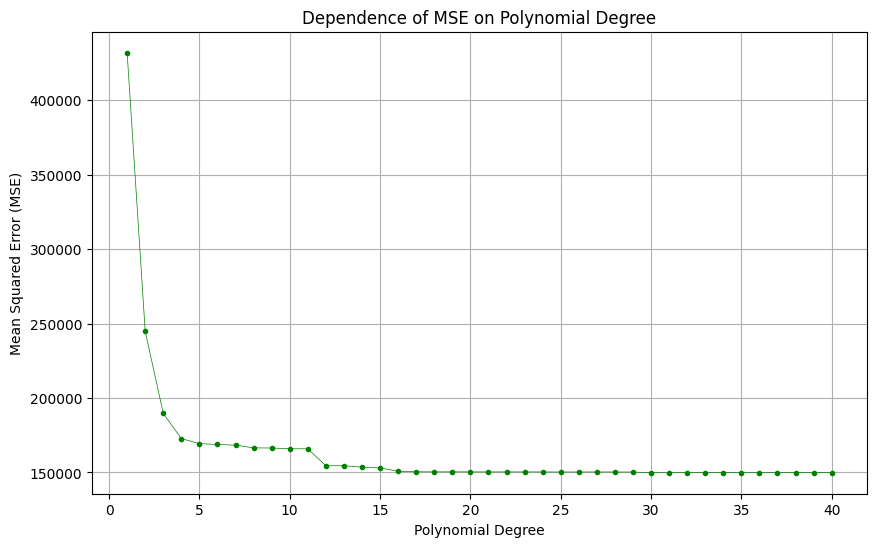

In [15]:
# Dependence of mse on polynomial degree

polList = []
mseList = []

for i in range(1, 41):
    polList.append(i)
    f2pi, residuals, rank, sv, rcond = np.polyfit(hours_data, requests_data, i, full=True)
    fxi = np.poly1d(f2pi)
    msei = mean_squared_error(requests_data,  fxi(hours_data), squared=True)
    mseList.append(msei)

plt.figure(figsize=(10, 6))
plt.plot(polList, mseList, marker='.', color='green', linewidth=0.5)
plt.title('Dependence of MSE on Polynomial Degree')
plt.xlabel('Polynomial Degree')
plt.ylabel('Mean Squared Error (MSE)')
plt.grid(True)
plt.show()


In [16]:
# Function for finding the mean square error

import time

def MSE(yTrue, yPred):
    trueVal = []
    predVal = []
    predValRaw = yPred

    for el in yTrue:
        trueVal.append(el)
    for el in predValRaw:
        predVal.append(el)
    n = len(trueVal)
    sum = 0
    for i in range(n):
        sum += (trueVal[i] - predVal[i])**2
    return (sum / n)

# time for 20 polinomial degree solving by my func
startTime = time.time()

MSEfc = MSE(requests_data, fx20(hours_data))
print(f'MSE by my func: {MSEfc}')

stopTime = time.time()
deltaTime = stopTime - startTime
print(f"Time taken for my function: {deltaTime} seconds")


# time for 20 polinomial degree solving by lib func
startTime = time.time()

MSElib = mean_squared_error(requests_data,  fx20(hours_data), squared=True)
print(f'MSE by lib func: {MSElib}')

stopTime = time.time()
deltaTime = stopTime - startTime
print(f"Time taken for lib function: {deltaTime} seconds")

MSE by my func: 150377.8626330428
Time taken for my function: 0.0032401084899902344 seconds
MSE by lib func: 150377.86263304277
Time taken for lib function: 0.0028934478759765625 seconds


# Лабораторная работа 5

In [17]:
import pandas as pd

data = pd.read_csv('web_traffic.tsv',delimiter='\t', names=['hour','n_requests'])
print(type(data))

inputVar = 'hour'
targetVar = 'n_requests'

hoursData = data[inputVar]
requestsData = data[targetVar]

filteredData = data.dropna()
filteredData.info()

train_border = 3.5
final_border = 4.2

<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.frame.DataFrame'>
Index: 735 entries, 0 to 742
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   hour        735 non-null    int64  
 1   n_requests  735 non-null    float64
dtypes: float64(1), int64(1)
memory usage: 17.2 KB


In [18]:
train_border = 3
final_border = 4.2

trainData  = int(train_border * 7 * 24)

final_border = int(final_border * 7 * 24)

border70 = int(round(trainData + (final_border - trainData) * 0.7, 0))

print('------')
print(trainData)
print(border70)
print(final_border)
print('------')

hrsDataTrain = hoursData[trainData:border70]
rqstsDataTrain = requestsData[trainData:border70]

hoursDataTest = hoursData[border70:final_border]
requestsDataTest = requestsData[border70:final_border]

print(hrsDataTrain[:5], rqstsDataTrain[:5])
print('-------------------')
print(hoursDataTest[:5], requestsDataTest[:5])


------
504
645
705
------
504    505
505    506
506    507
507    508
508    509
Name: hour, dtype: int64 504    1874.0
505    1816.0
506    1097.0
507    2015.0
508    2241.0
Name: n_requests, dtype: float64
-------------------
645    646
646    647
647    648
648    649
649    650
Name: hour, dtype: int64 645    3009.0
646    2538.0
647    2782.0
648    2491.0
649    2408.0
Name: n_requests, dtype: float64


In [19]:
import numpy as np

f2p1, residuals, rank, sv, rcond = np.polyfit(hrsDataTrain, rqstsDataTrain, 1, full=True)
print("Параметры модели (1-степень) {}".format(f2p1))

f2p2, residuals, rank, sv, rcond = np.polyfit(hrsDataTrain, rqstsDataTrain, 2, full=True)
print("Параметры модели (2-степень) {}".format(f2p2))

f2p3, residuals, rank, sv, rcond = np.polyfit(hrsDataTrain, rqstsDataTrain, 3, full=True)
print("Параметры модели (3-степень) {}".format(f2p3))


Параметры модели (1-степень) [  2.57168971 668.86706765]
Параметры модели (2-степень) [ 1.89337970e-02 -1.92021768e+01  6.89748670e+03]
Параметры модели (3-степень) [ 1.35211858e-03 -2.31347076e+00  1.31789870e+03 -2.47834678e+05]


In [20]:
import warnings
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

warnings.filterwarnings("ignore", message="'squared' is deprecated")

# 1 polinomial degree
fx1 = np.poly1d(f2p1)
r2Array1 = []
r2Array1.append(r2_score(rqstsDataTrain,  fx1(hrsDataTrain)))
rmse1 = mean_squared_error(rqstsDataTrain, fx1(hrsDataTrain), squared=False)
mse1 = mean_squared_error(rqstsDataTrain,  fx1(hrsDataTrain), squared=True)
mae1 = mean_absolute_error(rqstsDataTrain,  fx1(hrsDataTrain))
print(f'Степень полинома 1: r2array = {r2Array1}, mse = {mse1}, rmse = {rmse1}, mae = {mae1}')

# 2 polinomial degree
fx2 = np.poly1d(f2p2)
r2Array2 = []
r2Array2.append(r2_score(rqstsDataTrain,  fx2(hrsDataTrain)))
rmse2 = mean_squared_error(rqstsDataTrain, fx2(hrsDataTrain), squared=False)
mse2 = mean_squared_error(rqstsDataTrain,  fx2(hrsDataTrain), squared=True)
mae2 = mean_absolute_error(rqstsDataTrain,  fx2(hrsDataTrain))
print(f'Степень полинома 2: r2array = {r2Array2}, mse = {mse2}, rmse = {rmse2}, mae = {mae2}')

# 3 polinomial degree
fx3 = np.poly1d(f2p3)
r2Array3 = []
r2Array3.append(r2_score(rqstsDataTrain,  fx3(hrsDataTrain)))
rmse3 = mean_squared_error(rqstsDataTrain, fx3(hrsDataTrain), squared=False)
mse3 = mean_squared_error(rqstsDataTrain,  fx3(hrsDataTrain), squared=True)
mae3 = mean_absolute_error(rqstsDataTrain,  fx3(hrsDataTrain))
print(f'Степень полинома 3: r2array = {r2Array3}, mse = {mse3}, rmse = {rmse3}, mae = {mae3}')

Степень полинома 1: r2array = [0.07191065697741139], mse = 141406.31294974717, rmse = 376.04030761308974, mae = 289.8492660707468
Степень полинома 2: r2array = [0.07707590442569234], mse = 140619.3212634126, rmse = 374.9924282747754, mae = 289.33124206871247
Степень полинома 3: r2array = [0.11072716333080568], mse = 135492.12043553538, rmse = 368.0925433033592, mae = 281.40729322826326


При степени полинома 3, ```r_2 = 0.174``` при разбивке данных без учета очевидного тренда (начиная с 3.5 недели).

При степени полинома 3, ```r_2 = 0.757``` при разбивке данных c учетом очевидного тренда (начиная с 3.5 недели).

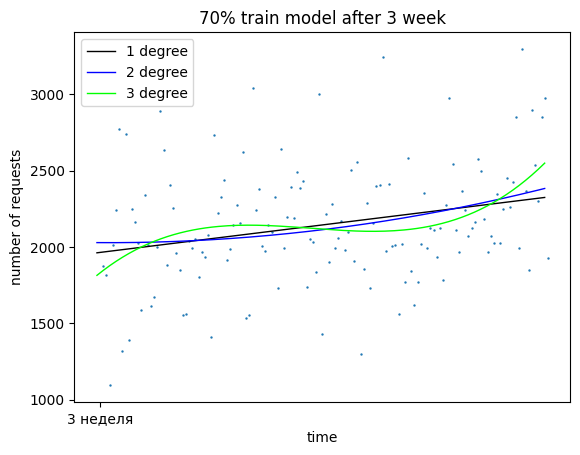

In [21]:
# Визуализация

import matplotlib.pyplot as plt

plt.title('70% train model after 3 week')
plt.scatter(hrsDataTrain, rqstsDataTrain, s=0.5)
plt.xlabel('time')
plt.ylabel('number of requests')
plt.xticks([w*7*24 for w in range(6)],["%i неделя" %w for w in range(6)])

f2x = np.linspace(trainData - 1, border70 - 1, len(hrsDataTrain))

# viz. polynomial degree 1
f2y1 = fx1(f2x)
plt.plot(f2x, f2y1, linewidth=1.0, color='black', label = '1 degree');

# viz. polynomial degree 2
f2y2 = fx2(f2x)
plt.plot(f2x, f2y2, linewidth=1.0, color='blue', label = '2 degree');

# viz. polynomial degree 3
f2y3 = fx3(f2x)
plt.plot(f2x, f2y3, linewidth=1.0, color='lime', label = '3 degree');

plt.autoscale(tight=False)
plt.legend()
plt.show()

# Ответить развернуто и пояснить ответ на вопрос ниже:

```Какая модель для гипотезы, при которой весь набор данных представляет собой два диапазона значений (например, от 0 недели до 3.5 недели и с 3.5 недели до конца или какой-то другой диапазон/граница), подходит наилучшим образом (дает наименьшую ошибку)?```

Аргументировать ответ метриками ошибок (MSE, RMSE, MAE).

Модель, в данном случае, это степень полинома.

Изменится ли ответ, если предположить, что степень полинома 20 плохо подходит для тестовых данных потому что ошибка получаемая для тестовых данных на много порядков больше, чем ошибка для тренировочного набора данных.

Если мы разделим данные на два диапазона:

и обучим модель 20 степени полинома на данных, тренд которых мы предположим наиболее оптимальным для будущих данных (с 3.5 до 4.1 недели):

Посчитав ошибку RMSE с использованием обученной модели степени полинома 20 на данных начиная с 3.5 недели, мы получим огромную ошибку на много порядков превышающую ошибку на тренировочной выборке.

```Какая степень полинома дает там ошибку меньшую или примерно равную ошибке на тренировочном датасете?```. Поясните свой ответ на основе данных.

Модель от 0 до 3.5 будет иметь меньшую ошибку, чем модель от 3.5 до 4.1

In [40]:
divider1 = int(3.5*7*24)
divider2 = int(4.1*7*24)

hoursData1, requestsData1 = hoursData[:divider1], requestsData[:divider1]
hoursData2, requestsData2 = hoursData[divider1:divider2], requestsData[divider1:divider2]

hoursDataTest, requestsDataTest = hoursData[divider2:], requestsData[divider2:]

print(requestsData1.shape, requestsData2.shape, requestsDataTest.shape)

f20p, residuals, rank, sv, rcond = np.polyfit(hoursData2, requestsData2, 20, full=True)
f20 = np.poly1d(f20p)
rmse1 = mean_squared_error(requestsData2,f20(hoursData2), squared=False)
rmse2 = mean_squared_error(requestsDataTest,f20(hoursDataTest), squared=False)
mse1 = mean_squared_error(requestsData2,f20(hoursData2), squared=True)
mse2 = mean_squared_error(requestsDataTest,f20(hoursDataTest), squared=True)
mae1 = mean_absolute_error(requestsData2,f20(hoursData2))
mae2 = mean_absolute_error(requestsDataTest,f20(hoursDataTest))
print(f"RMSE (для данных c 3.5 недели по 4.1 недели)= {rmse1:.5}")
print(f"MSE (для данных c 3.5 недели по 4.1 недели)= {mse1:.5}")
print(f"MAE (для данных c 3.5 недели по 4.1 недели)= {mae1:.5}")
print(f"RMSE (только для данных до 3.5 недели)= {rmse2:.5}")
print(f"MSE (только для данных до 3.5 недели)= {mse2:.5}")
print(f"MAE (только для данных до 3.5 недели)= {mae2:.5}")

print("-------------------------------------")

f4p, residuals, rank, sv, rcond = np.polyfit(hoursData2, requestsData2, 4, full=True)
f4 = np.poly1d(f4p)
rmse1_4 = mean_squared_error(requestsData2,f4(hoursData2), squared=False)
rmse2_4 = mean_squared_error(requestsDataTest,f4(hoursDataTest), squared=False)
mse1_4 = mean_squared_error(requestsData2,f4(hoursData2), squared=True)
mse2_4 = mean_squared_error(requestsDataTest,f4(hoursDataTest), squared=True)
mae1_4 = mean_absolute_error(requestsData2,f4(hoursData2))
mae2_4 = mean_absolute_error(requestsDataTest,f4(hoursDataTest))
print(f"RMSE (для данных c 3.5 недели по 4.1 недели)= {rmse1_4:.5}")
print(f"MSE (для данных c 3.5 недели по 4.1 недели)= {mse1_4:.5}")
print(f"MAE (для данных c 3.5 недели по 4.1 недели)= {mae1_4:.5}")
print(f"RMSE (только для данных до 3.5 недели)= {rmse2_4:.5}")
print(f"MSE (только для данных до 3.5 недели)= {mse2_4:.5}")
print(f"MAE (только для данных до 3.5 недели)= {mae2_4:.5}")



(588,) (100,) (55,)
RMSE (для данных c 3.5 недели по 4.1 недели)= 308.84
MSE (для данных c 3.5 недели по 4.1 недели)= 9.5383e+04
MAE (для данных c 3.5 недели по 4.1 недели)= 230.16
RMSE (только для данных до 3.5 недели)= 2.0095e+07
MSE (только для данных до 3.5 недели)= 4.0381e+14
MAE (только для данных до 3.5 недели)= 1.0191e+07
-------------------------------------
RMSE (для данных c 3.5 недели по 4.1 недели)= 333.45
MSE (для данных c 3.5 недели по 4.1 недели)= 1.1119e+05
MAE (для данных c 3.5 недели по 4.1 недели)= 257.91
RMSE (только для данных до 3.5 недели)= 5145.3
MSE (только для данных до 3.5 недели)= 2.6474e+07
MAE (только для данных до 3.5 недели)= 4056.0


У второй модели значительно меньшая ошибка для диапазона 3.5-4.1